In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [24]:
dataset_path = 'C:\\Users\\DWQE\\LinuxFiles\\MachineLearning2020\\PersonalProject\\Dataset\\'
df = pd.read_csv(dataset_path + 'train.csv')

def date2age(df):
    year = int(df['birth_date'].split('/')[-1])
    return 2020 - (year + 1900 if year != 0 else year + 2000)

def level2int(df, attribute):
    levels = {'Low': 1, 'Medium': 2, 'High':3}
    return levels[df[attribute]]

def ln(df, attribute):
    return math.log(df[attribute])

df['birth_date'] = df.apply(date2age, axis=1)
df['work_rate_att'] = df.apply(level2int, args=('work_rate_att',), axis = 1)
df['work_rate_def'] = df.apply(level2int, args=('work_rate_def',), axis = 1)

df_ngk = df.loc[df['rw'] .notnull()].dropna(axis=1)
df_ngk = df_ngk.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'],axis=1)
df_ngk['ln_y'] = df_ngk.apply(ln, args=('y',), axis=1)
df_ngk.to_csv(dataset_path + 'train_ngk.csv', index=False)
ngk_cor = df_ngk.corr()
ngk_headers = list(df_ngk.columns.values)

df_gk = df.loc[df['gk'] .notnull()].dropna(axis=1)
df_gk = df_gk.drop(['skill_moves', 'work_rate_att','work_rate_def'],axis=1)
df_gk['ln_y'] = df_gk.apply(ln, args=('y',), axis=1)
df_gk.to_csv(dataset_path + 'train_gk.csv', index=False)
gk_cor = df_gk.corr()
gk_headers = list(df_gk.columns.values)

In [28]:
df = df.fillna(0)

In [29]:
df['gk'] = df['gk'] * 3

In [43]:
df

,birth_date,height_cm,weight_kg,nationality,potential,pac,sho,pas,dri,def,...,st,lw,cf,cam,cm,cdm,cb,lb,gk,y
0,30,180,76,110,80,85,74,72,78,62,...,75.0,77.0,77.0,76.0,74.0,70.0,66.0,70.0,0.0,1100.0
1,21,181,70,51,70,81,56,45,58,26,...,59.0,58.0,58.0,56.0,51.0,43.0,40.0,43.0,0.0,30.0
2,29,175,71,90,68,75,64,67,70,42,...,63.0,67.0,66.0,67.0,63.0,56.0,48.0,54.0,0.0,90.0
3,22,181,72,6,76,88,56,41,59,22,...,57.0,58.0,56.0,53.0,44.0,36.0,36.0,41.0,0.0,26.0
4,29,194,94,111,75,55,27,49,50,72,...,47.0,46.0,46.0,48.0,54.0,67.0,72.0,65.0,0.0,400.0
5,30,175,66,68,57,59,51,54,57,51,...,53.0,55.0,54.0,55.0,55.0,54.0,53.0,53.0,0.0,10.0
6,35,189,73,164,63,52,39,39,45,60,...,47.0,43.0,44.0,42.0,45.0,55.0,62.0,54.0,0.0,21.0
7,31,172,70,43,71,75,70,70,73,57,...,67.0,70.0,69.0,70.0,69.0,64.0,59.0,64.0,0.0,240.0
8,24,175,78,1,69,65,63,58,57,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,24.0
9,24,184,79,51,77,74,24,39,45,70,...,44.0,42.0,42.0,43.0,47.0,60.0,69.0,63.0,0.0,220.0


In [ ]:
def max_grade(df):
    grades = list(df[poss])
    grades.sort()
    score = g

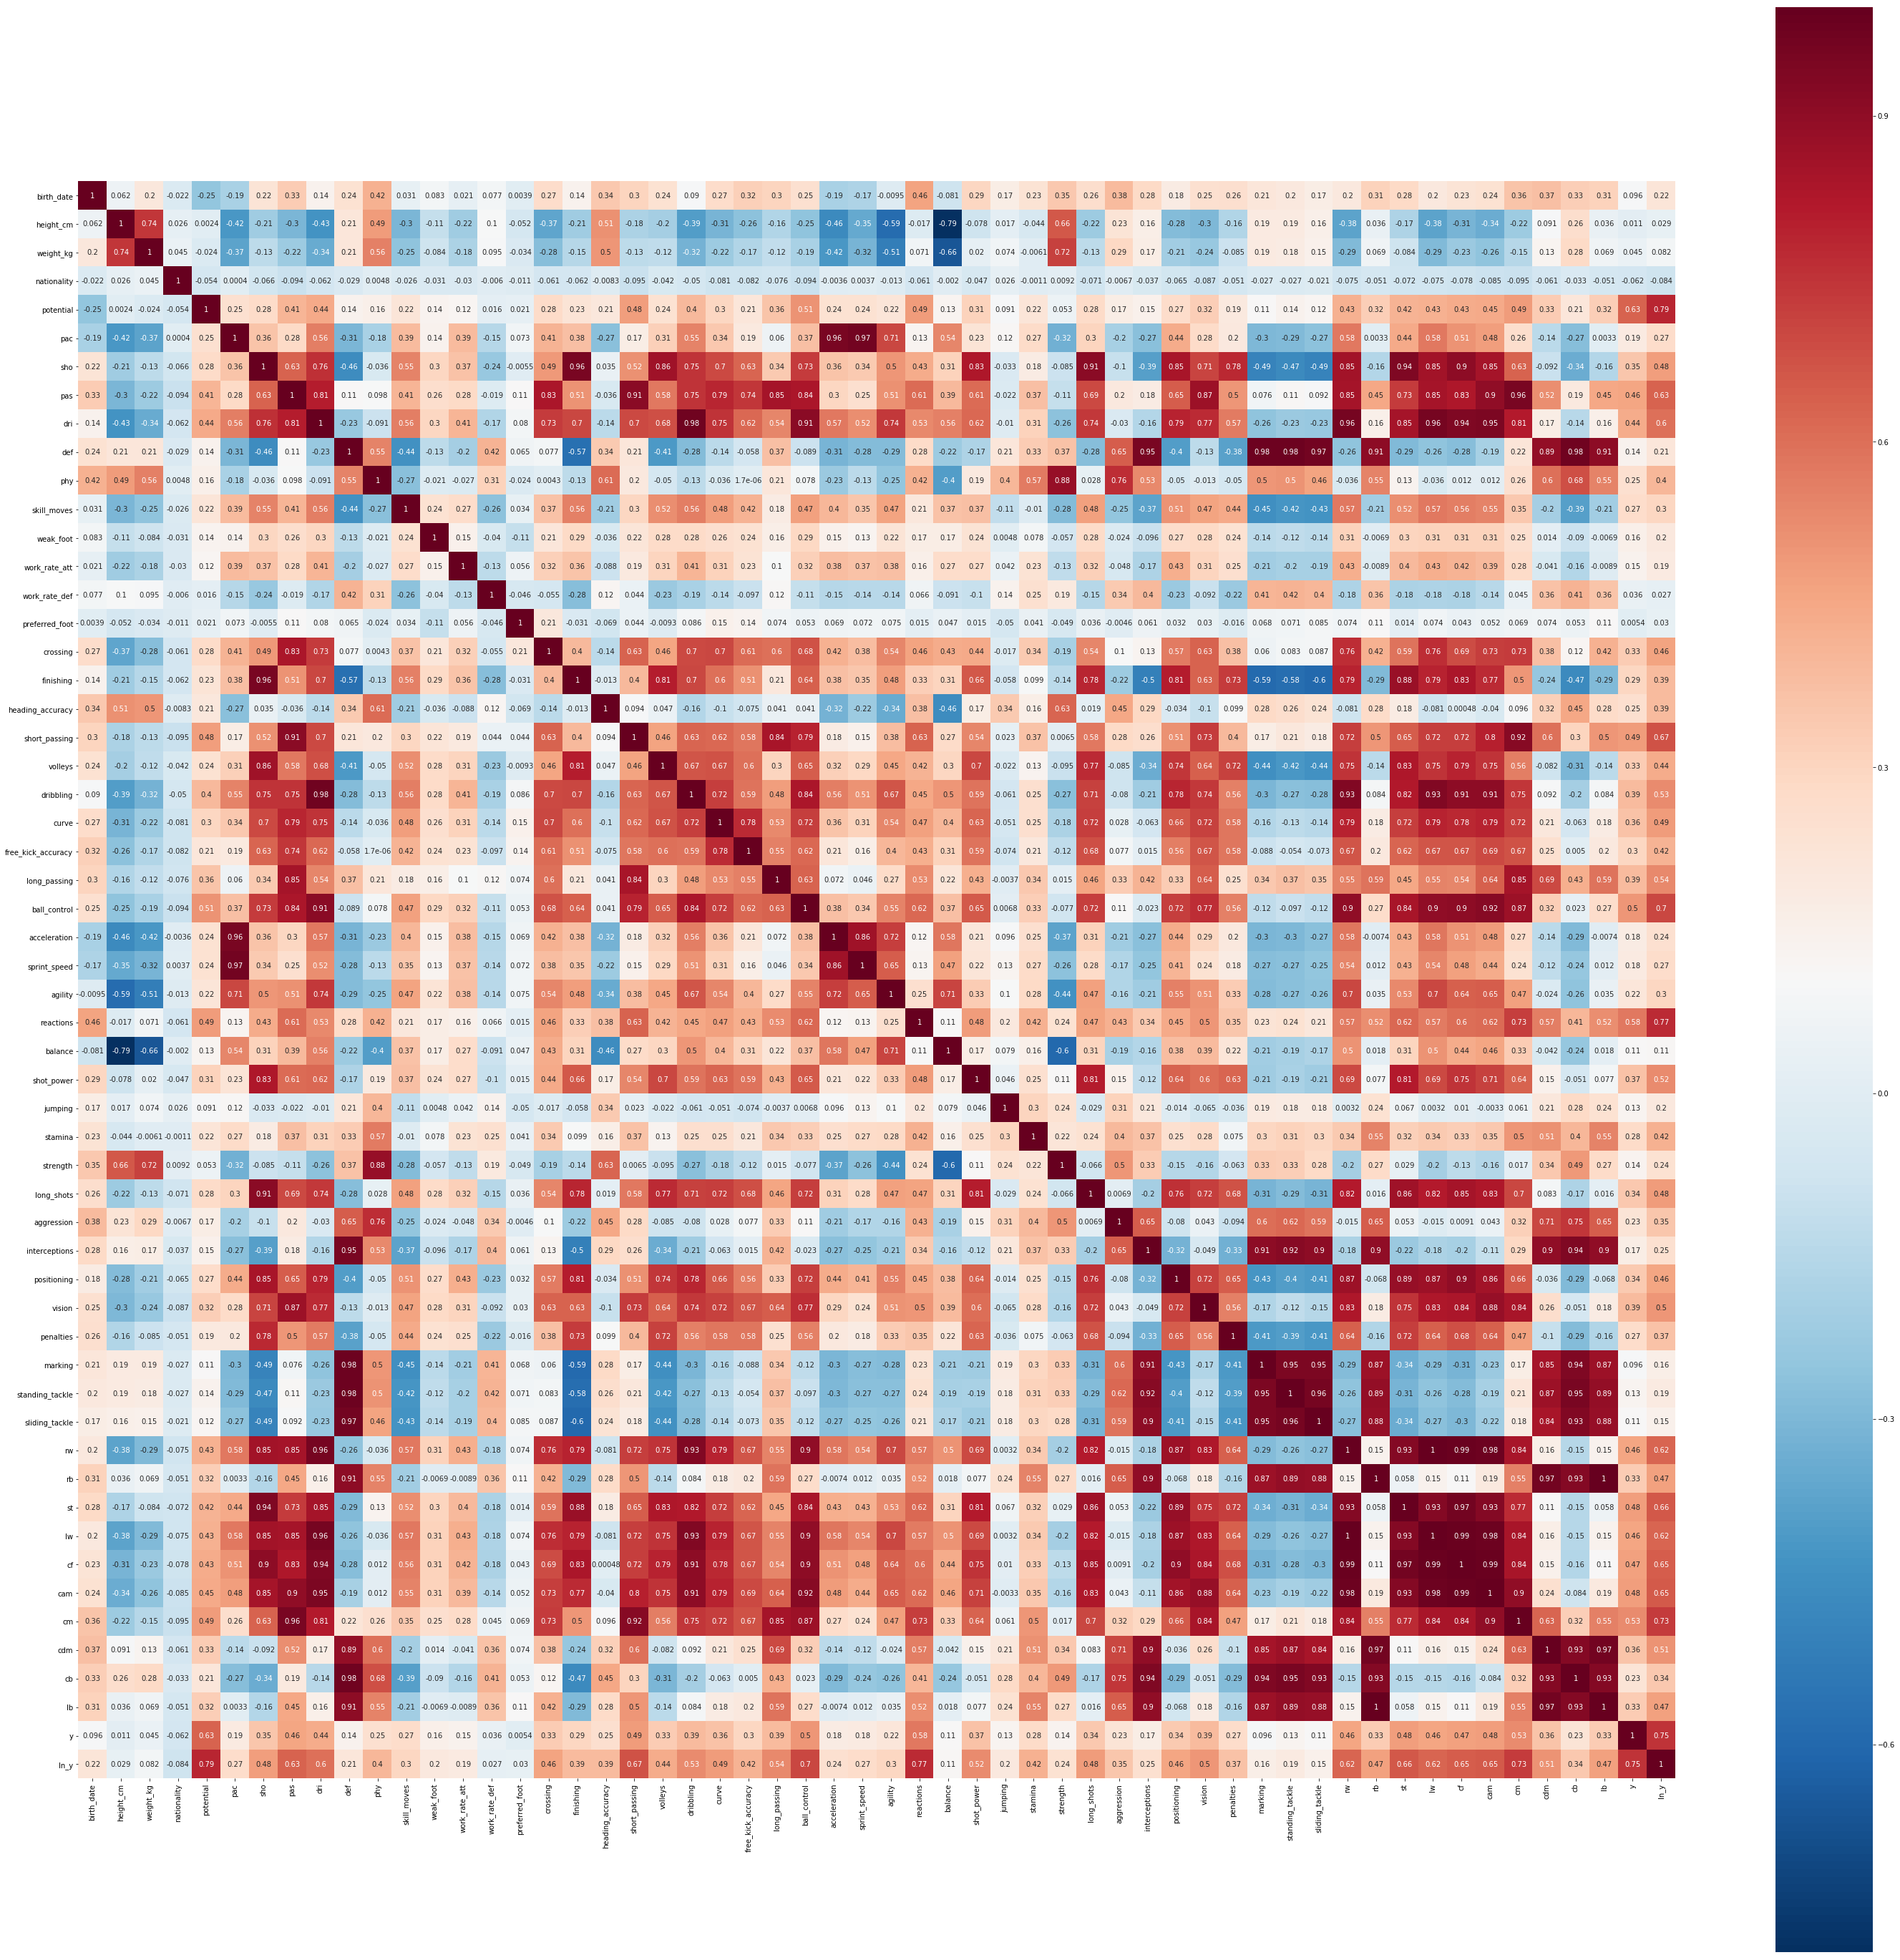

In [10]:
plt.subplots(figsize=(50,50))
sns.heatmap(ngk_cor, xticklabels= True, yticklabels= True,annot=True, vmax=1, square=True, cmap="RdBu_r")
plt.savefig(dataset_path + 'ngk\\ngk_corr.jpg', dpi=100)

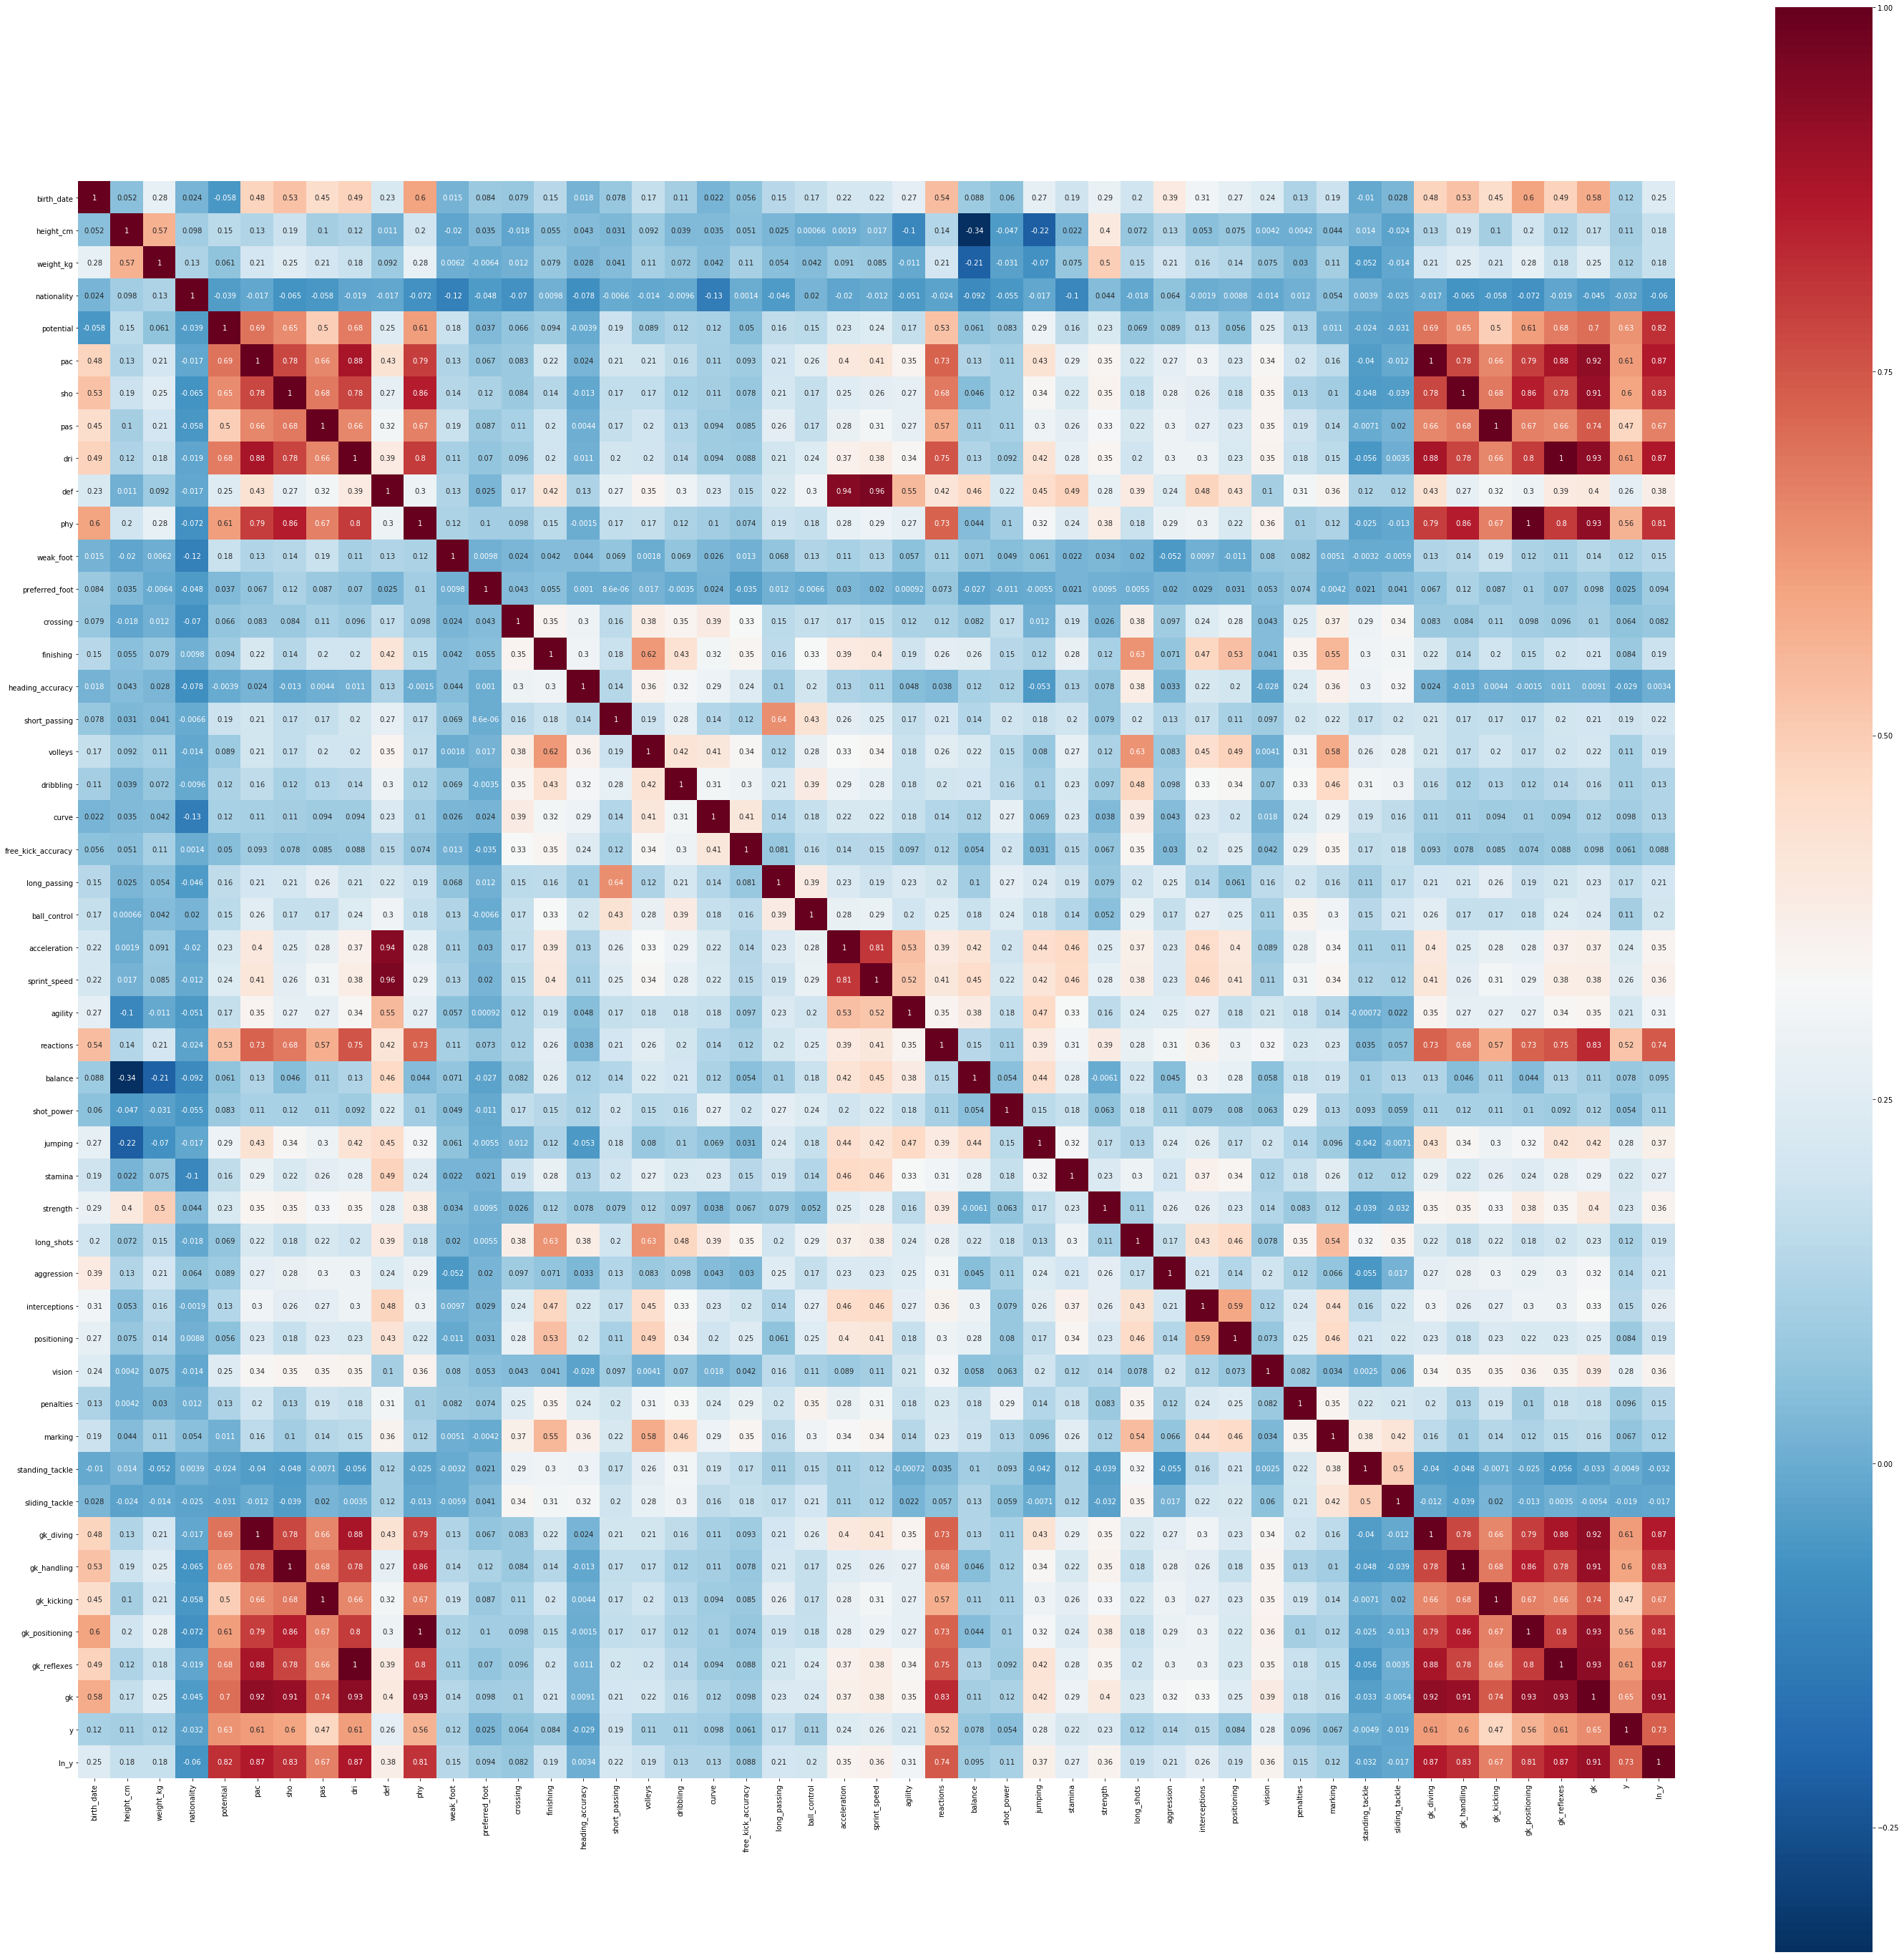

In [11]:
plt.subplots(figsize=(50,50))
sns.heatmap(gk_cor, xticklabels= True, yticklabels= True,annot=True, vmax=1, square=True, cmap="RdBu_r")
plt.savefig(dataset_path + 'gk\\gk_corr.jpg', dpi=100)
plt.show()

In [12]:
def dataframe_distributions(dateframe, subpath):
    dataframe_headers = list(dateframe.columns.values)
    import warnings
    warnings.filterwarnings("ignore")
    
    def col_distplot(col_name):
        plt.subplots(figsize=(20,10))
        sns.distplot(np.array(dateframe[col_name]))
        plt.title(col_name)
        plt.savefig(dataset_path + subpath +col_name + '.jpg', dpi=100)
        
    for cn in dataframe_headers:
        col_distplot(cn)

In [ ]:
dataframe_distributions(df_ngk,'ngk\\')

In [ ]:
dataframe_distributions(df_gk,'gk\\')

In [3]:
from sklearn.ensemble import RandomForestRegressor

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
X_label = ngk_headers[:-2]
X, y = df_ngk[X_label], df_ngk['ln_y']

In [13]:
regr = RandomForestRegressor(criterion='mae', random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
importances = list(regr.feature_importances_)
x_impt = dict(zip(X_label, importances))

In [30]:
x_impt = sorted(x_impt.items(), key = lambda kv:(kv[1], kv[0]))[::-1]

In [39]:
x_labels, x_values = [impt[0] for impt in x_impt][:10],  [impt[1] for impt in x_impt][:10]
vals = sum(x_values)
x_values = [xv / vals for xv in x_values]

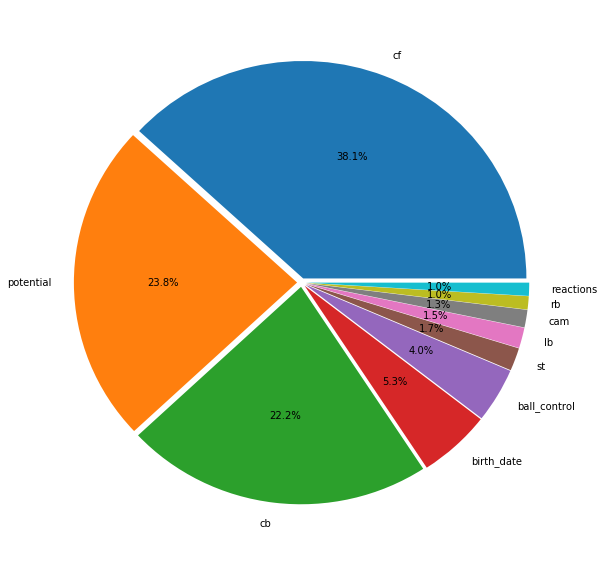

In [42]:
plt.figure(figsize=(10,10))
explode=[0.02] * 10
plt.pie(x_values[:10],explode = explode,labels=x_labels[:10],autopct='%1.1f%%')#绘制饼图
plt.show()

In [2]:
dataset_path = 'C:\\Users\\DWQE\\LinuxFiles\\MachineLearning2020\\PersonalProject\\Dataset\\'
df = pd.read_csv(dataset_path + 'test.csv')

def date2age(df):
    year = int(df['birth_date'].split('/')[-1])
    return 2020 - (year + 1900 if year != 0 else year + 2000)

def level2int(df, attribute):
    levels = {'Low': 1, 'Medium': 2, 'High':3}
    return levels[df[attribute]]

df['birth_date'] = df.apply(date2age, axis=1)
df['work_rate_att'] = df.apply(level2int, args=('work_rate_att',), axis = 1)
df['work_rate_def'] = df.apply(level2int, args=('work_rate_def',), axis = 1)

df_ngk = df.loc[df['rw'] .notnull()].dropna(axis=1)
df_ngk = df_ngk.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'],axis=1)
df_ngk.to_csv(dataset_path + 'test_ngk.csv', index=False)

df_gk = df.loc[df['gk'] .notnull()].dropna(axis=1)
df_gk = df_gk.drop(['skill_moves', 'work_rate_att','work_rate_def'],axis=1)
df_gk.to_csv(dataset_path + 'test_gk.csv', index=False)

In [51]:
def max_val(df):
    poss = ['rw','rb','st','lw','cf','cam','cm','cdm','cb','lb', 'gk']
    return sum(sorted(list(df[poss]))[::-1][:3]) / 3

In [52]:
df['max_val'] = df.apply(max_val, axis = 1)

In [53]:
df

,birth_date,height_cm,weight_kg,nationality,potential,pac,sho,pas,dri,def,...,lw,cf,cam,cm,cdm,cb,lb,gk,y,max_val
0,30,180,76,110,80,85,74,72,78,62,...,77.0,77.0,76.0,74.0,70.0,66.0,70.0,0.0,1100.0,77.000000
1,21,181,70,51,70,81,56,45,58,26,...,58.0,58.0,56.0,51.0,43.0,40.0,43.0,0.0,30.0,58.333333
2,29,175,71,90,68,75,64,67,70,42,...,67.0,66.0,67.0,63.0,56.0,48.0,54.0,0.0,90.0,67.000000
3,22,181,72,6,76,88,56,41,59,22,...,58.0,56.0,53.0,44.0,36.0,36.0,41.0,0.0,26.0,57.666667
4,29,194,94,111,75,55,27,49,50,72,...,46.0,46.0,48.0,54.0,67.0,72.0,65.0,0.0,400.0,68.000000
5,30,175,66,68,57,59,51,54,57,51,...,55.0,54.0,55.0,55.0,54.0,53.0,53.0,0.0,10.0,55.000000
6,35,189,73,164,63,52,39,39,45,60,...,43.0,44.0,42.0,45.0,55.0,62.0,54.0,0.0,21.0,57.000000
7,31,172,70,43,71,75,70,70,73,57,...,70.0,69.0,70.0,69.0,64.0,59.0,64.0,0.0,240.0,70.000000
8,24,175,78,1,69,65,63,58,57,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,24.0,60.000000
9,24,184,79,51,77,74,24,39,45,70,...,42.0,42.0,43.0,47.0,60.0,69.0,63.0,0.0,220.0,65.000000
